In [1]:
import os
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D   

# to embed plots within the notebook
%matplotlib inline

In [2]:
def warmUpExercise():
 
    A = np.eye(5)  
    
    return A

In [3]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [4]:
from urllib.request import urlopen
url = 'https://github.com/IITGuwahati-AI/Learning-Content/raw/master/Phase%203%20-%202020%20(Summer)/Week%202%20(Apr%205%20-%20Apr%2011)/Exercise1/Data/ex1data1.txt'
raw_data = urlopen(url)

# To read comma separated data
data = np.loadtxt(raw_data, delimiter=',')
X, y = data[:, 0], data[:, 1]

In [5]:
def plotData(x, y):
    
    fig = pyplot.figure()  # to open a new figure
    
    pyplot.plot(x, y, 'ro', ms=8, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')

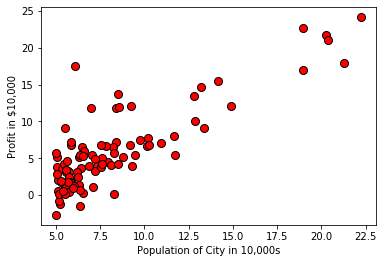

In [6]:
plotData(X, y)

In [8]:
m=y.size
X = np.stack([np.ones(m), X], axis=1)       # for adding a column of ones to the raw data's X-column

In [9]:
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [10]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


In [11]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    m = y.shape[0]          # number of training examples
    
    theta = theta.copy()    #this makes a copy of theta, to avoid changing the original array
    
    J_history = []          # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        
        avg_error = (1/m)*(np.dot(((np.dot(X,theta.T))-(y.T)),X))
        theta[0]=theta[0]-(alpha*(avg_error[0]))
        theta[1]=theta[1]-(alpha*(avg_error[1]))

        # to save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [12]:
# initialize fitting parameters
theta = np.zeros(2)

# gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


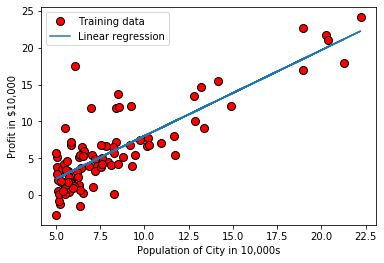

In [13]:
# plot the linear fit
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);

In [14]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



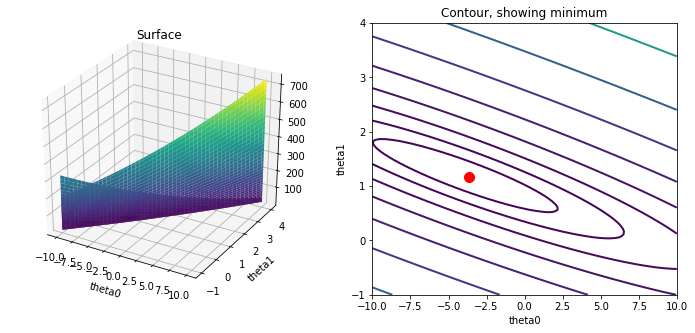

In [15]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, np.array([theta0, theta1]))
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')


# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')
pass